# EDA and Feature Engineering of Google play Store
1. Problem statement.- Today 1.85 million different apps are available for users to download. Our objective is to find the most Poluplar Category, find the App with largest number of installs, the App with largest size etc.

# Steps We are going to follow 
1. Data Cleaning
2. Exploratory Data Analysis

In [71]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
# it will ignore the warning coming during the run time
import warnings
warnings.filterwarnings('ignore')


In [72]:
df = pd.read_csv('googleplaystore.csv')

In [73]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [74]:
# Checking the Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Observation--
There is missing values in the dataset.

In [75]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [76]:
df['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

The Above error is occurs due to presence of "3.0M" in between the data

In [ ]:
# Checking the presence of "3.0M"
df['Reviews'].str.isnumeric().sum()

In [ ]:
# Finding the "3.0M"
df[~df['Reviews'].str.isnumeric()]

In [83]:
df_copy = df.copy()

In [84]:
# Dropping the index that contain "3.0M"
df_copy = df_copy.drop(index=10472)

In [85]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [86]:
#Changing the review into int form 
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [87]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [88]:
df_copy['Size'] = df_copy['Size'].str.replace("M","000")
df_copy['Size'] = df_copy['Size'].str.replace("k","")
df_copy['Size'] = df_copy['Size'].replace("Varies with device",np.nan)
df_copy['Size'] = df_copy['Size'].astype(float)

In [89]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [90]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [91]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [92]:
chars_to_remove = ['$',',','+']
colmn_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in colmn_to_clean: 
        df_copy[cols] = df_copy[cols].str.replace(item,'')

In [93]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [94]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [96]:
df_copy['Installs']=df_copy['Installs'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(float)

In [97]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [98]:
df_copy['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

In [100]:
# converting the Last Updated into day time format.
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [103]:
#The .dt accessor is used to work with datetime-like data in a pandas Series. It allows you to extract specific components like day, month, year, etc.
df_copy['day'] = df_copy['Last Updated'].dt.day
df_copy['months'] = df_copy['Last Updated'].dt.month
df_copy['year']= df_copy['Last Updated'].dt.year

In [104]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  day             10840 non-null  int32         
 14  months          10840 non-null  int32         
 15  year   

In [106]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,months,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


# EDA

In [107]:
# Checking for duplicate data 

In [114]:
df_copy[df_copy.duplicated(subset="App")].shape

(1181, 16)

# Observation--
There are duplicate data

In [115]:
# Removing the duplicate items accordinf to App
df_copy = df_copy.drop_duplicates(subset="App",keep="first")

In [116]:
df_copy[df_copy.duplicated(subset="App")].shape

(0, 16)

In [124]:
## Lets go ahead and explore more data 
numeric_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype!= "O"]
categorical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype == "O"]

#printing the columns
print("We have {} numeric feature {}".format(len(numeric_feature),numeric_feature))
print("We have {} categorical feature {}".format(len(categorical_feature),categorical_feature))

We have 9 numeric feature ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'day', 'months', 'year']
We have 7 categorical feature ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


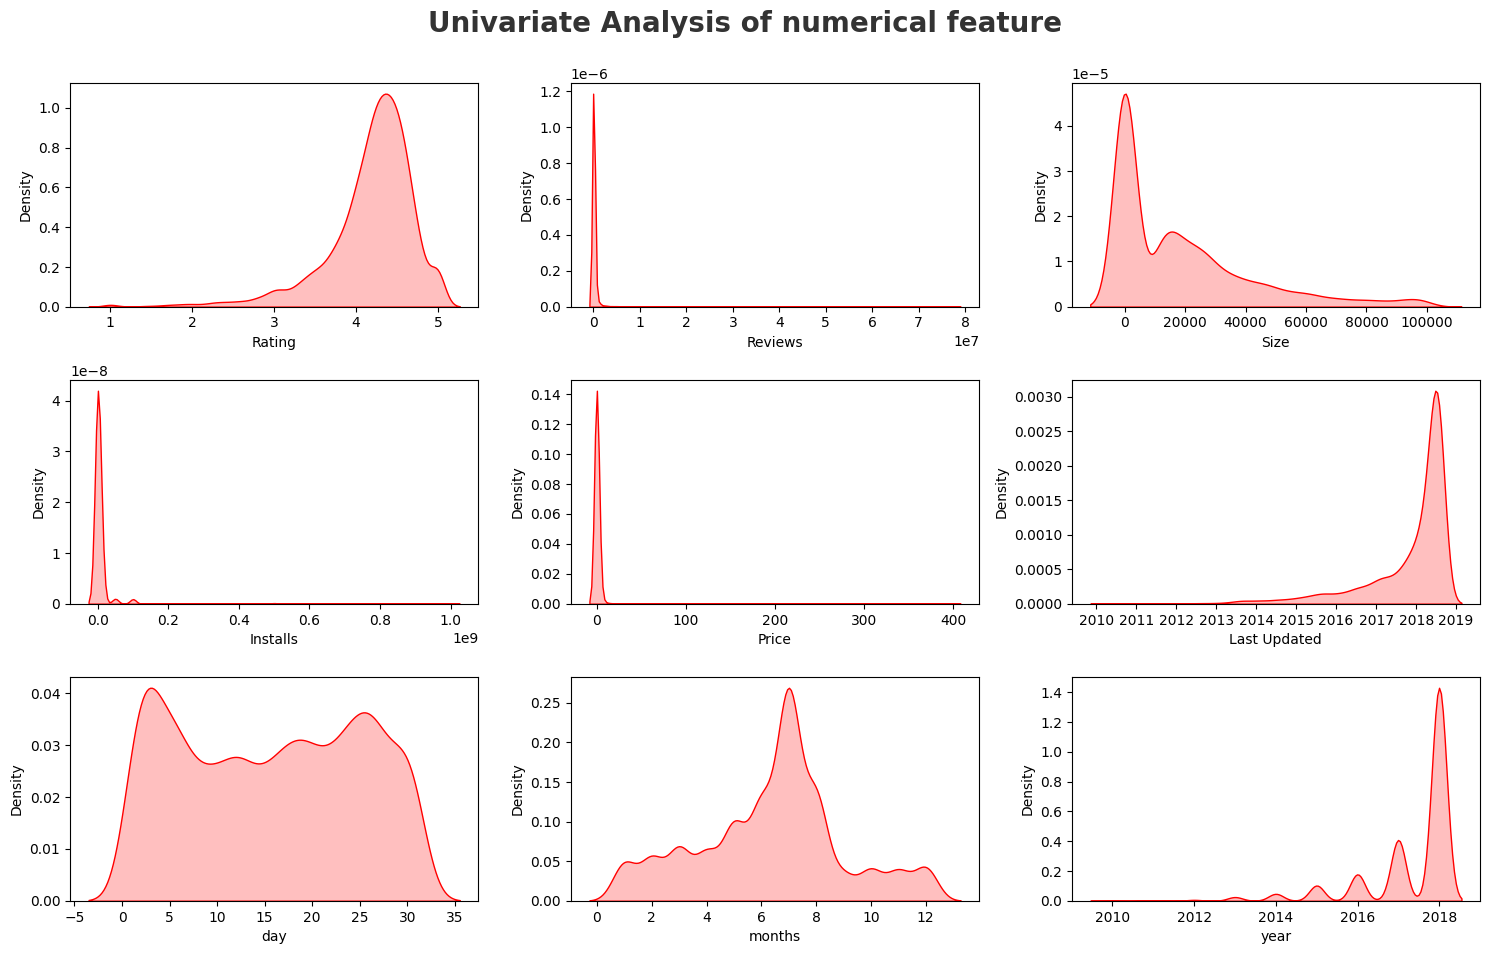

In [129]:
## Visualization Diagram

plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of numerical feature',fontsize=20, fontweight="bold",alpha=0.8, y=1.)

for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_feature[i]],shade=True,color="r")
    plt.xlabel(numeric_feature[i])
    # Ensures that the subplots do not overlap with one another or with the figure title.
    plt.tight_layout()
    

# Observation--
Rating, Last Updated are left squeed and Review Install and Price are Right Squeed data

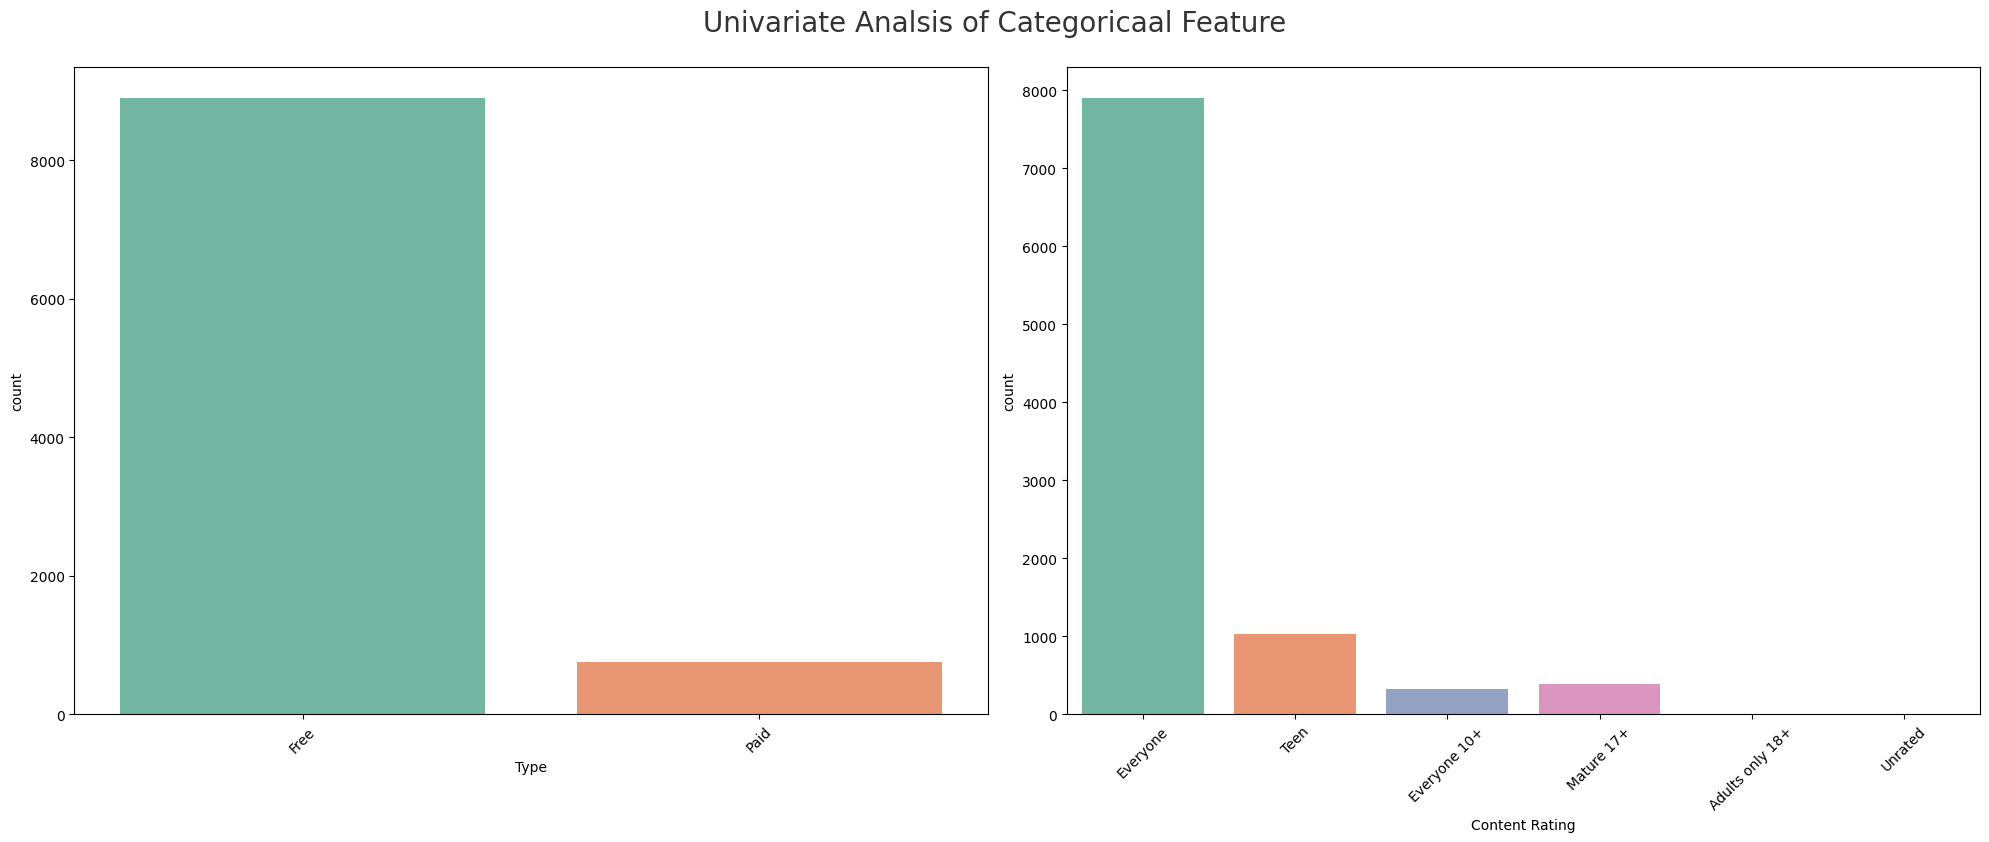

In [135]:
# Categorical columns 
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analsis of Categoricaal Feature',fontsize=20, fontweight = 12, alpha = 0.8,y= 1.)

category = ['Type','Content Rating']
for i in range(0, len(category)):
    plt.subplot(2,2,i+1)
    #sns.countplot() is a Seaborn function that creates a bar plot showing the counts of unique values in a categorical feature.
    sns.countplot(x=df_copy[category[i]],palette="Set2")
    plt.xlabel(category[i])
    # Rotates the tick labels on the x-axis by 45 degrees to prevent overlap.
    plt.xticks(rotation=45)
    plt.tight_layout()

# What is the most popular category of App

<Axes: ylabel='count'>

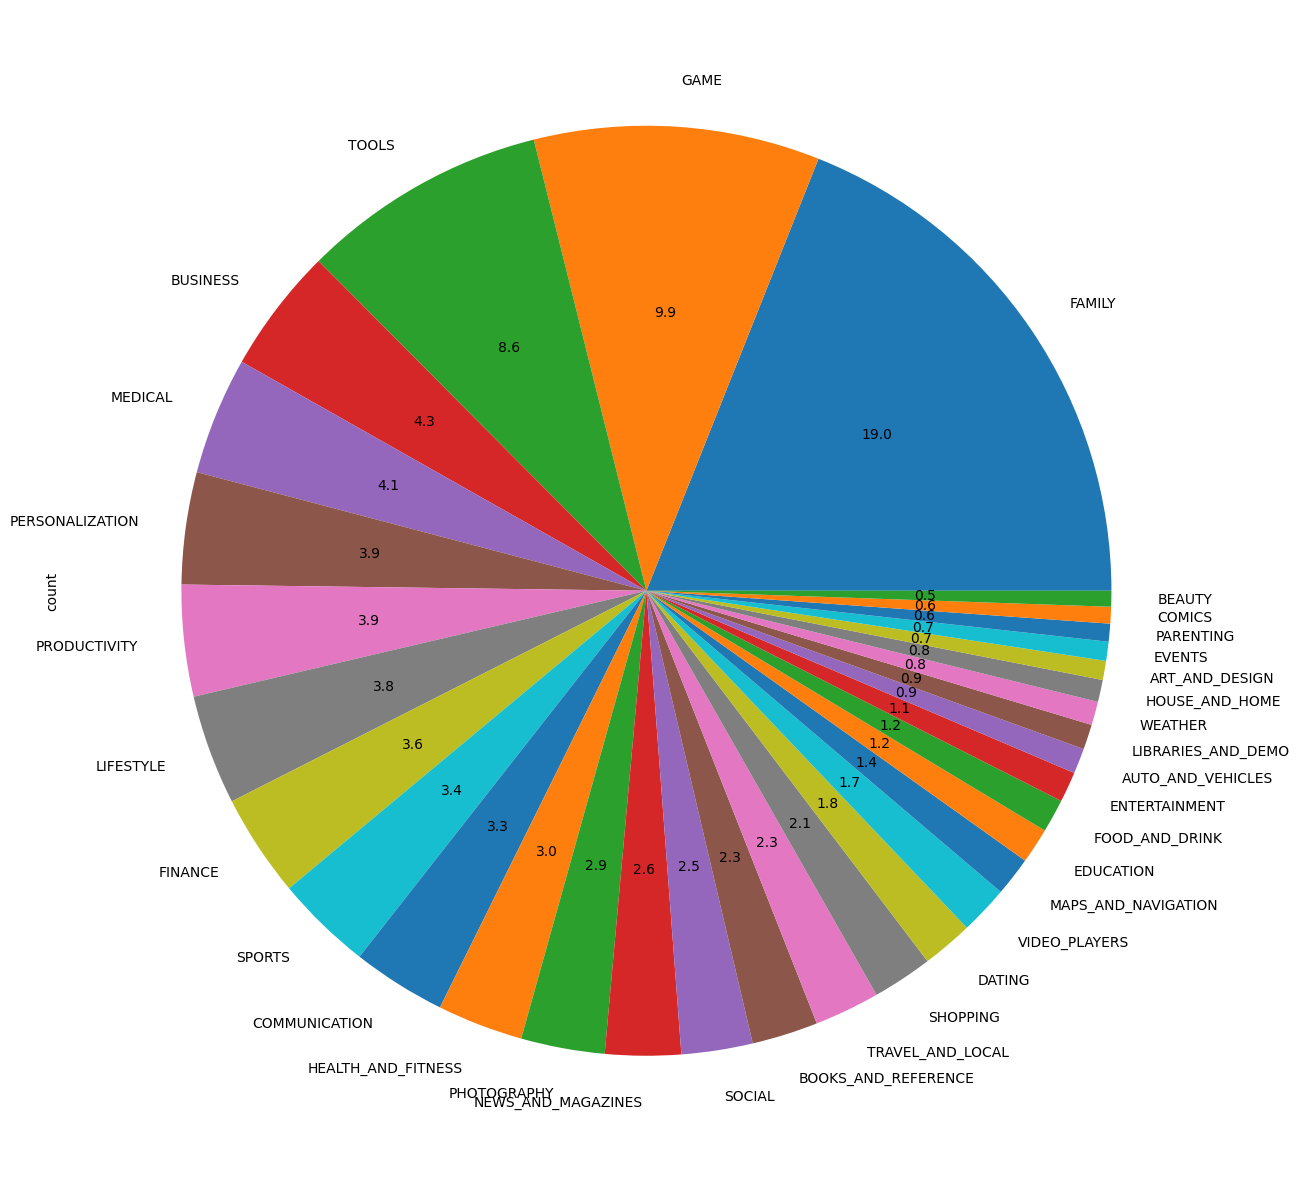

In [141]:
df_copy["Category"].value_counts().plot.pie(y=df_copy["Category"],figsize=(15,20),autopct="%1.1f")

# Obsevation-- 
Falimy, Games and tools category are most popular and Beauty,Comics and Parenting are lest polupar category

In [150]:
# Top 10 Category App 
category = pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns={"Category":"Count"},inplace =True)

In [152]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


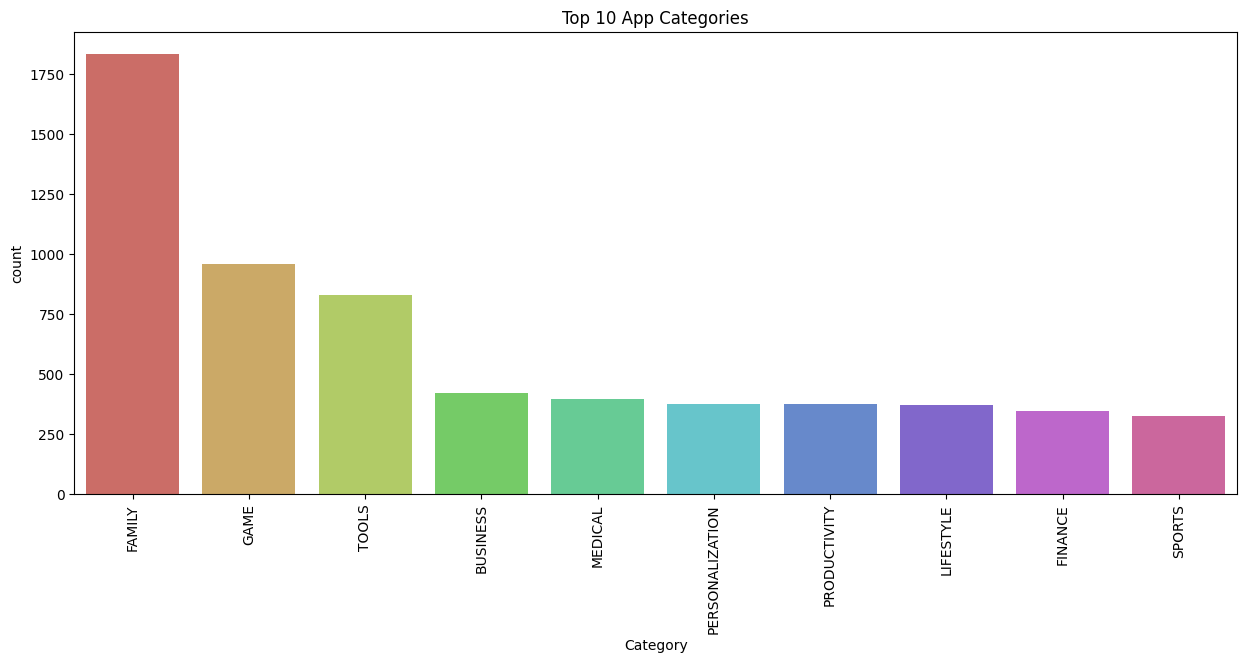

In [155]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y='count',data=category[:10],palette='hls')
plt.title("Top 10 App Categories")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# which category has largest number of installation. 
#what are the top 5 most installed app in each category